In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of files and their respective paths
file_paths = [
    '../data/Water Level - Los Angeles.csv',
    '../data/Water Level - Santa Barbara.csv',
    '../data/Water Level - Santa Monica.csv',
    '../data/Water Level - La Jolla.csv',
    '../data/Water Level - Monterey.csv',
    '../data/Water Level - San Diego.csv'
]

# List to store dataframes
dataframes = []

# Read each file, calculate monthly and hourly averages, and store in list
for path in file_paths:
    city_name = os.path.basename(path).split(' - ')[-1].replace('.csv', '')
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month_name()
    df['Hour'] = df['Time (GMT)']
    
    # Calculate monthly average for the comparative monthly heat map
    monthly_avg = df.groupby(['Month'])['Verified (ft)'].mean()
    monthly_avg.name = city_name  # Rename series to city name
    
    # Calculate hourly average for the comparative hourly heat map
    hourly_avg = df.groupby(['Hour'])['Verified (ft)'].mean()
    hourly_avg.name = city_name  # Rename series to city name
    
    # Store results
    dataframes.append({
        'monthly_avg': monthly_avg,
        'hourly_avg': hourly_avg
    })

# Concatenate all monthly and hourly averages into single dataframes
monthly_avg_df = pd.concat([d['monthly_avg'] for d in dataframes], axis=1)
hourly_avg_df = pd.concat([d['hourly_avg'] for d in dataframes], axis=1)

# Reorder the index by month order for monthly averages
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_df = monthly_avg_df.reindex(month_order)

monthly_avg_df, hourly_avg_df


(           Los Angeles  Santa Barbara  Santa Monica  La Jolla  Monterey  \
 Month                                                                     
 January       2.960087       2.961001      2.948602  2.817547  3.159415   
 February      2.880446       2.863633      2.862215  2.735965  3.065190   
 March         2.695974       2.687144      2.691203  2.554388  2.939315   
 April         2.682014       2.662153      2.670222  2.583444  2.690736   
 May           2.985094       2.954919      2.961546  2.875833  3.044382   
 June          2.958931       2.949028      2.949514  2.833222  3.061042   
 July          3.216747       3.191586      3.211815  3.142419  3.138683   
 August        3.355941       3.330618      3.346734  3.253078  3.327567   
 September     3.280764       3.259153      3.263222  3.207972  3.289403   
 October       3.390000       3.355605      3.358723  3.276949  3.364973   
 November      3.280500       3.246847      3.255986  3.199889  3.331389   
 December   

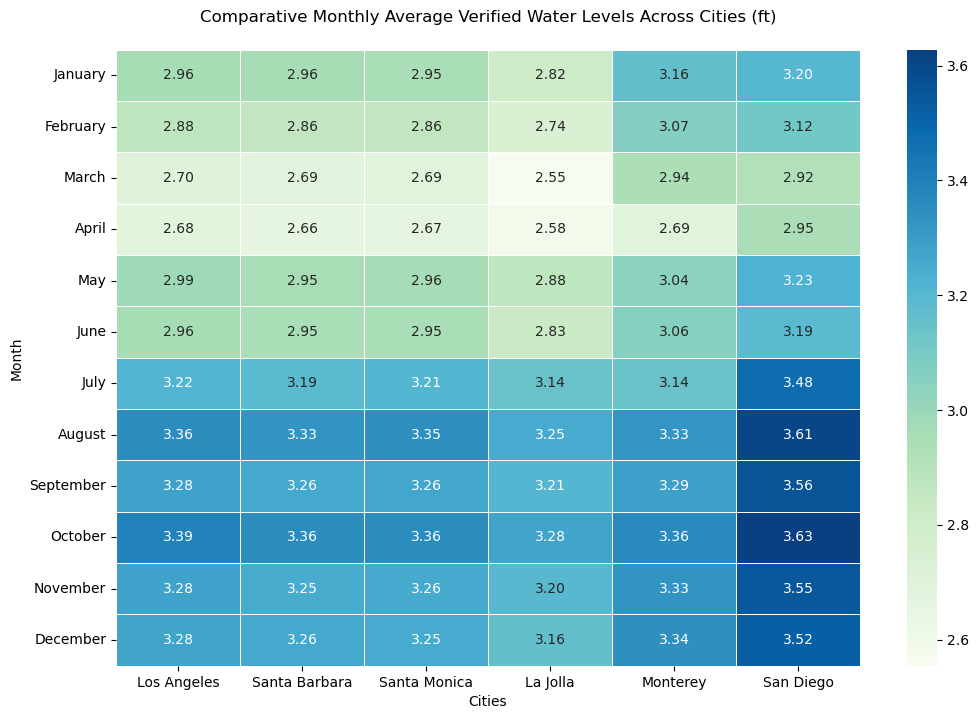

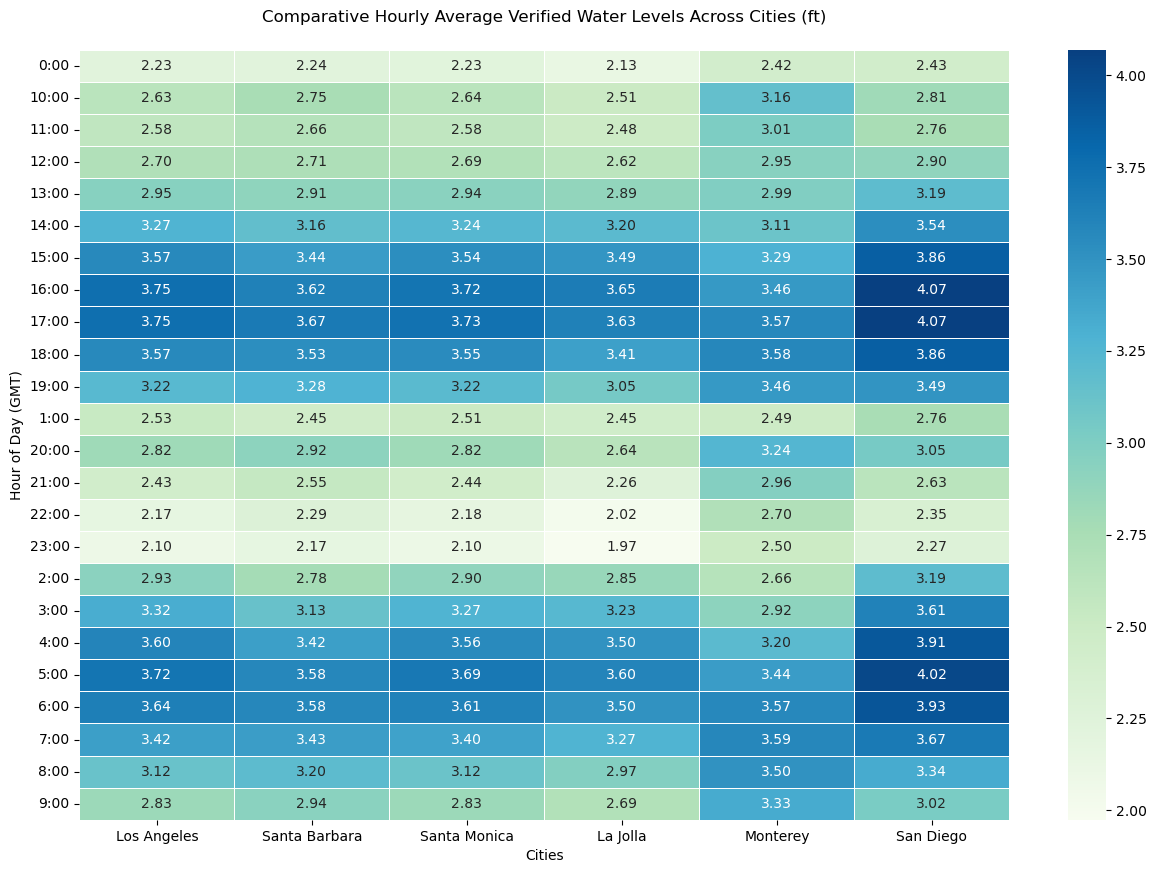

In [5]:
# Plotting the regional heat map for monthly average data across cities
plt.figure(figsize=(12, 8))
regional_monthly_heatmap = sns.heatmap(monthly_avg_df, cmap="GnBu", annot=True, fmt=".2f", linewidths=.5)
regional_monthly_heatmap.set_title('Comparative Monthly Average Verified Water Levels Across Cities (ft)', pad=20)
plt.xlabel('Cities')
plt.ylabel('Month')
plt.show()

# Plotting the regional heat map for hourly average data across cities
plt.figure(figsize=(15, 10))
regional_hourly_heatmap = sns.heatmap(hourly_avg_df, cmap="GnBu", annot=True, fmt=".2f", linewidths=.5)
regional_hourly_heatmap.set_title('Comparative Hourly Average Verified Water Levels Across Cities (ft)', pad=20)
plt.xlabel('Cities')
plt.ylabel('Hour of Day (GMT)')
plt.show()
